#
0. Import Necessary Modules


In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# 
1. Begin with some visualization of PJM's history with renewable generation

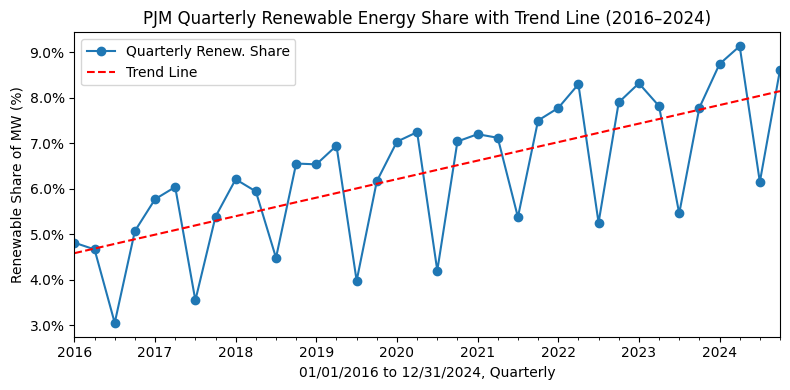

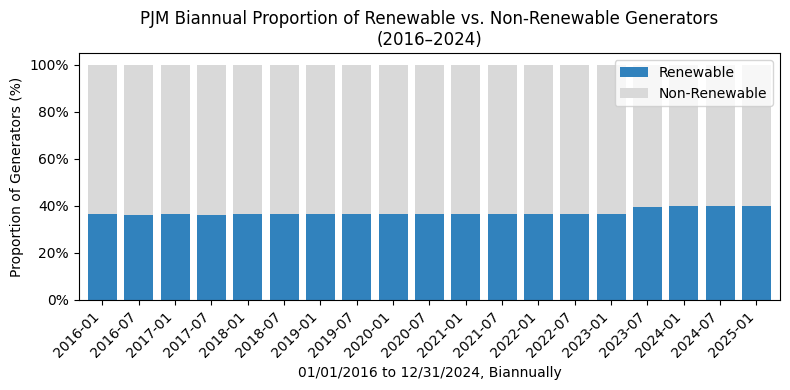

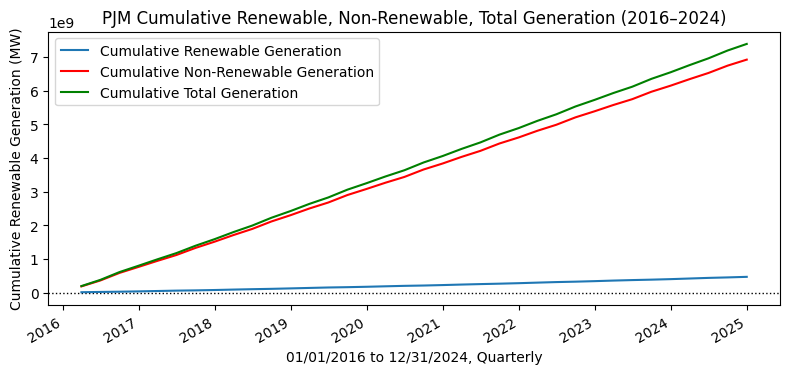

In [2]:
#1.0 Some Visualization of Renewable Generators in PJM
data_folder = "/Users/austin/Desktop/Individual Research/gen_by_fuel"

files = [os.path.join(data_folder, f"gen_by_fuel{year}.csv") for year in range(2016, 2025)]

df_list=[]
for filepath in files:
    if os.path.exists(filepath):
        tmp = pd.read_csv(filepath,parse_dates=["datetime_beginning_ept"],date_format="%m/%d/%Y %I:%M:%S %p")
        df_list.append(tmp)

df = pd.concat(df_list, ignore_index=True)
df = df.set_index("datetime_beginning_ept")

to_drop = ["fuel_type", "fuel_percentage_of_total", "datetime_beginning_utc"]
df = df.drop(columns=to_drop)

# a) First Plot: Quarterly Renewable Share and Trend Line
total = (df['mw'].resample("QE").sum().rename("total_mw"))
renewable = (df.loc[df["is_renewable"],"mw"].resample("QE").sum().rename("renewable_mw"))

mix = pd.concat([renewable, total], axis=1)
mix["renewable_share"]= mix["renewable_mw"] / mix["total_mw"]

x = mix.index.map(lambda d: d.toordinal()).values
y = mix["renewable_share"].values
slope, intercept = np.polyfit(x, y, deg=1)
trend_values = slope * x + intercept

mix["trend_line"] = pd.Series(data=trend_values, index=mix.index)

fig, ax = plt.subplots(figsize=(8, 4))
mix["renewable_share"].plot(marker="o",ax=ax,label="Quarterly Renew. Share")
mix["trend_line"].plot(linestyle="--",color="red",linewidth=1.5,ax=ax,label="Trend Line")

ax.set_xlabel("01/01/2016 to 12/31/2024, Quarterly")
ax.set_ylabel("Renewable Share of MW (%)")
ax.set_title("PJM Quarterly Renewable Energy Share with Trend Line (2016–2024)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# b) Second Plot: Biannual Proportion of Renewable Generators vs. Non-Renewable Generators
total_count = df["is_renewable"].resample("6ME").count()
renewable_count = df["is_renewable"].resample("6ME").sum()
nonrenewable_count = total_count - renewable_count
prop = pd.DataFrame({"Renewable":renewable_count/total_count,"Non‐Renewable":nonrenewable_count/total_count}, index=total_count.index)
fig, ax = plt.subplots(figsize=(8, 4))

prop.plot(kind="bar",stacked=True,width=0.8,ax=ax,colormap="tab20c")

ax.set_xlabel("01/01/2016 to 12/31/2024, Biannually")
ax.set_ylabel("Proportion of Generators (%)")
ax.set_title("PJM Biannual Proportion of Renewable vs. Non‐Renewable Generators\n(2016–2024)")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_xticklabels([d.strftime("%Y‐%m") for d in prop.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

# c) Third Plot: Cumulative Total, Renewable, Non-Renewable Generations
nonrenewable = (total-renewable).rename("nonrenewable")
cumulative_nonrenewable = nonrenewable.cumsum()
cumulative_renewable = renewable.cumsum()
cumulative_total = total.cumsum()
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0, color="black", linestyle=":", linewidth=1)
cumulative_renewable.plot(ax=ax,linestyle="-",label="Cumulative Renewable Generation")
cumulative_nonrenewable.plot(ax=ax,color="red",linestyle="-",label="Cumulative Non-Renewable Generation")
cumulative_total.plot(ax=ax,color="Green",linestyle="-",linewidth=1.5,label="Cumulative Total Generation")
ax.set_xlabel("01/01/2016 to 12/31/2024, Quarterly")
ax.set_ylabel("Cumulative Renewable Generation (MW)")
ax.set_title("PJM Cumulative Renewable, Non-Renewable, Total Generation (2016–2024)")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

#
2. Now

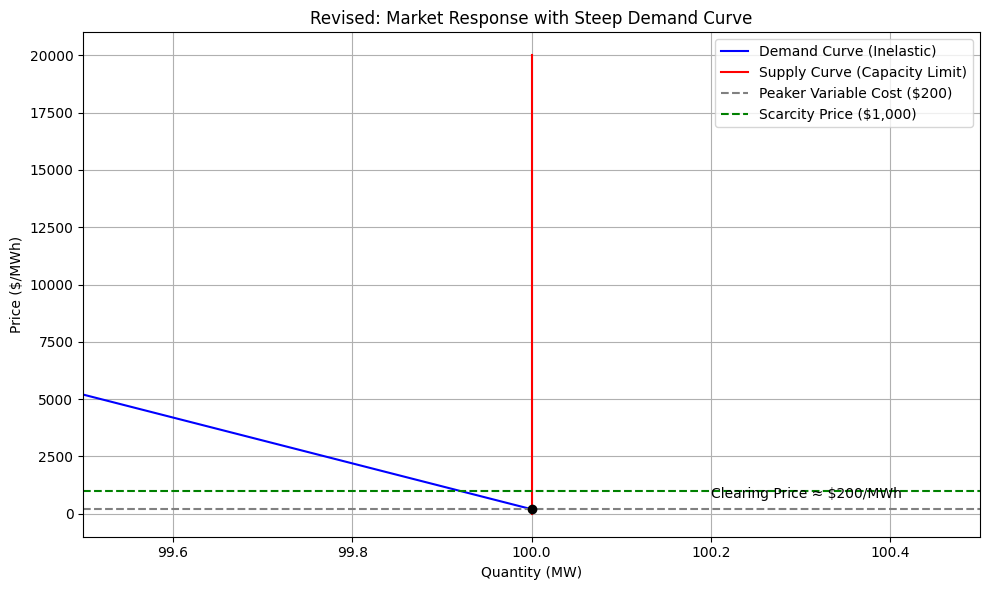

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Tighter x-axis and steeper demand curve to reflect very inelastic demand
price_range = np.linspace(200, 20000, 500)
demand = 100 - 0.0001 * (price_range - 200)  # Much steeper demand curve

# Supply limit
supply_capacity = 100
supply_price = [0, 20000]
supply_quantity = [supply_capacity, supply_capacity]

# Market clearing
clearing_price_index = np.argmin(np.abs(demand - supply_capacity))
clearing_price = price_range[clearing_price_index]
clearing_quantity = demand[clearing_price_index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(demand, price_range, label='Demand Curve (Inelastic)', color='blue')
plt.plot(supply_quantity, supply_price, label='Supply Curve (Capacity Limit)', color='red')
plt.scatter([clearing_quantity], [clearing_price], color='black', zorder=5)
plt.text(clearing_quantity + 0.2, clearing_price + 500, f'Clearing Price ≈ ${int(clearing_price):,}/MWh', fontsize=10)

plt.axhline(y=200, color='gray', linestyle='--', label='Peaker Variable Cost ($200)')
plt.axhline(y=1000, color='green', linestyle='--', label='Scarcity Price ($1,000)')

plt.title("Revised: Market Response with Steep Demand Curve")
plt.xlabel("Quantity (MW)")
plt.ylabel("Price ($/MWh)")
plt.xlim(99.5, 100.5)  # Zoom into the region around full capacity
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
